# REVIEW PROJECT ANALYSIS

## Description:
Help a leading mobile brand understand the voice of the customer by analyzing the reviews of their product on Amazon and the topics that customers are talking about. You will perform topic modeling on specific parts of speech. You’ll finally interpret the emerging topics.

## Problem Statement:
A popular mobile phone brand, Lenovo has launched their budget smartphone in the Indian market. The client wants to understand the VOC (voice of the customer) on the product. This will be useful to not just evaluate the current product, but to also get some direction for developing the product pipeline. The client is particularly interested in the different aspects that customers care about. Product reviews by customers on a leading e-commerce site should provide a good view4

## Domain: 
Amazon reviews for a leading phone brand

## Analysis to be done:
POS tagging, topic modeling using LDA, and topic interpretation

## Content: 
#### Dataset: ‘K8 Reviews v0.2.csv’

#### Columns: Sentiment: The sentiment against the review (4,5 star reviews are positive, 1,2 are negative)
#### Reviews: The main text of the review

## Steps to perform:

Discover the topics in the reviews and present it to business in a consumable format. Employ techniques in syntactic processing and topic modeling.

Perform specific cleanup, POS tagging, and restricting to relevant POS tags, then, perform topic modeling using LDA. Finally, give business-friendly names to the topics and make a table for business.

## Task 1: Read the .csv file using Pandas. Take a look at the top few records.

In [11]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
nltk.download('tagsets')

#Read the Dataset
df = pd.read_csv('K8 Reviews v0.2.csv')
df.head()

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Reena\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


## Visualization showing the length of each reviews

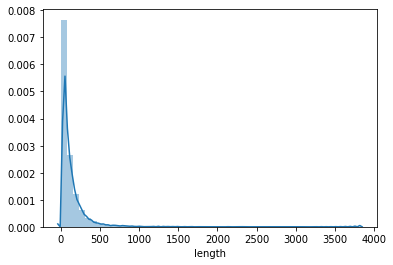

In [12]:
# Let us look into the first few records of the dataset
df.head()
df['length'] = df['review'].apply(len)
sns.distplot(df.length)


Most of the review comments are withing 500 words as seen from the seaborn plot

## Visualization showing the sentiments of each review

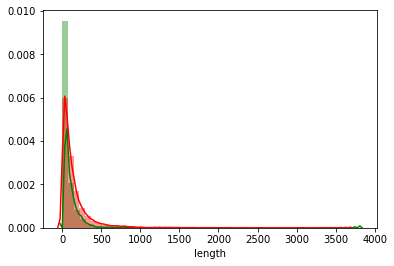

In [13]:
sns.distplot(df[df.sentiment ==1].length, color='green',bins =50)
sns.distplot(df[df.sentiment ==0].length, color='red',bins =50)

## Visualization showing the length of the review comments when sentiments are positive and negative

The green lined plot indicates positive sentiments and the red lined pot indicated negative sentiments

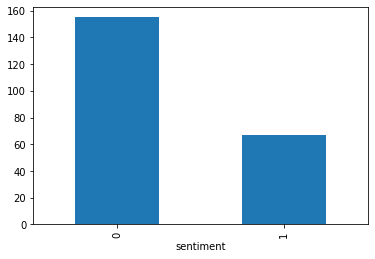

In [14]:
groupedData = df.groupby('sentiment')
groupedData.length.mean().plot(kind ='bar')

We can conclude from the above bar plot that reviews having negative sentiments are always written longer

## Task 2:Normalize casings for the review text and extract the text into a list for easier manipulation.

Extracting the review text into list. Values is in form of array which will then be converted into list.
Let us normalize the casing by keeping text in lowercase 

In [60]:

reviews = list(df['review'].values)
reviews = [review.lower() for review in reviews]
print ("Normalized and extracted text in list format. Please preview:")
print (reviews[0])

Normalized and extracted text in list format. Please preview:
good but need updates and improvements


## Task 3: Tokenize the reviews using NLTKs word_tokenize function.

In [61]:
review_tokens = [nltk.word_tokenize(review) for review in reviews]
print ("Let us preview the firts revieew that has the word_tokenize function applied")
review_tokens[0]

Let us preview the firts revieew that has the word_tokenize function applied


['good', 'but', 'need', 'updates', 'and', 'improvements']

Using nltk library , word tokenization for every review is done
Sample preview of the first review being tokenized


## Task 4: Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.

In [62]:
pos_tagged = [nltk.pos_tag(review) for review in review_tokens]
print (" Parts of speech applied on each sentence. Please preview:") 
pos_tagged[0]

 Parts of speech applied on each sentence. Please preview:


[('good', 'JJ'),
 ('but', 'CC'),
 ('need', 'VBP'),
 ('updates', 'NNS'),
 ('and', 'CC'),
 ('improvements', 'NNS')]

In [18]:
?nltk.pos_tag

## Task 5: For the topic model, we should  want to include only nouns.

   ### a. Find out all the POS tags that correspond to nouns.

   ### b. Limit the data to only terms with these tags.



In [25]:
# a. Find out all the POS tags that correspond to nouns.
print ("Please find below the definition of various POS tags supported by NLTK.")
nltk.help.upenn_tagset()

Please find below the definition of various POS tags supported by NLTK.
$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibu

In [26]:
#b .  Finding Pos tags curresponding to Nouns
#[review  for review in pos_tagged for pos_tag in review if pos_tag[1].startswith('NN')]
reviews_noun = []

for review in pos_tagged:
    reviews_noun.append([postag for postag in review if postag[1].startswith('NN')])
    
print (" Let us preview the first review that has data corresponing to Noun POS {} ".format(reviews_noun[0]))
print (" Let us preview the second review that has data corresponing to Noun POS {} ".format(reviews_noun[1]))


 Let us preview the first review that has data corresponing to Noun POS [('updates', 'NNS'), ('improvements', 'NNS')] 
 Let us preview the second review that has data corresponing to Noun POS [('mobile', 'NN'), ('i', 'NN'), ('battery', 'NN'), ('hell', 'NN'), ('backup', 'NN'), ('hours', 'NNS'), ('uses', 'NNS'), ('idle', 'NN'), ('discharged.this', 'NN'), ('lie', 'NN'), ('amazon', 'NN'), ('lenove', 'NN'), ('battery', 'NN'), ('charger', 'NN'), ('hours', 'NNS'), ('don', 'NN')] 


## Task 6: Lemmatize. 

   ### a. Different forms of the terms need to be treated as one.

   ### b. No need to provide POS tag to lemmatizer for now.

In [63]:
print ("Let us use the WordNetLemmatizer for this task . We are not considering the POS tag.")
lem = nltk.WordNetLemmatizer()
lem_reviews =[]
for  review in reviews_noun:
    lem_reviews.append([lem.lemmatize(postag[0]) for postag in review])
print ("Please preview the lemmatized version of the reviews")
print (lem_reviews[0])

Let us use the WordNetLemmatizer for this task . We are not considering the POS tag.
Please preview the lemmatized version of the reviews
['update', 'improvement']


## Task 7:Remove stopwords and punctuation (if there are any).

In [58]:
from nltk.corpus import stopwords
from string import punctuation
clean_reviews = []
for review in lem_reviews:
    clean_reviews.append([word for word in review if word not in (stopwords.words('English') + list(punctuation))])
print ("Please preview the version of the reviews that do not have stop words and punctuation")
print (clean_reviews[0])

Please preview the version of the reviews that do not have stop words and punctuation
['update', 'improvement']


## Task 8:Create a topic model using LDA on the cleaned-up data with 12 topics.

   ### a. Print out the top terms for each topic.

   ### b. What is the coherence of the model with the c_v metric?


In [29]:
#The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


# Create Dictionary
id2word = corpora.Dictionary(clean_reviews)
print ("Please preview the corpora dictionary")
print (id2word)

# Create Corpus
texts = clean_reviews
clean_reviews[1]


Please preview the corpora dictionary
Dictionary(10138 unique tokens: ['improvement', 'update', 'amazon', 'backup', 'battery']...)


['mobile',
 'battery',
 'hell',
 'backup',
 'hour',
 'us',
 'idle',
 'discharged.this',
 'lie',
 'amazon',
 'lenove',
 'battery',
 'charger',
 'hour']

In [30]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
print ("Please preview the document frequency")
print (corpus[200])

Please preview the document frequency
[(427, 1), (428, 1), (429, 1), (430, 1)]


# What does LDA do?

LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.
Once you provide the algorithm with the number of topics, all it does it to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.
When I say topic, what is it actually and how it is represented?
A topic is nothing but a collection of dominant keywords that are typical representatives. Just by looking at the keywords, you can identify what the topic is all about.

The following are key factors to obtaining good segregation topics:

1. The quality of text processing.
2. The variety of topics the text talks about.
3. The choice of topic modeling algorithm.
4. The number of topics fed to the algorithm.
5. The algorithms tuning parameters.

# Building the topic model
We have everything required to train the LDA model. In addition to the corpus and dictionary, you need to provide the number of topics as well.

Apart from that, alpha and eta are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to 1.0/num_topics prior.

chunksize is the number of documents to be used in each training chunk. update_every determines how often the model parameters should be updated and passes is the total number of training passes.

In [97]:
# Build LDA model with 12 Topics choosing Random State as 42

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=12, 
                                       random_state=42,
                                       passes=10,
                                       per_word_topics=True)

# Build LDA model and find the ideal random state when the no of topics is 12 by running random state over 1 to 100.
maxv = 0
maxrs = 0
for rs in range(1,100):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=12, 
                                           random_state=rs,
                                           passes=10,
                                           per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_reviews, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print ('Coherence Score:{} RS : {} '.format(coherence_lda,rs))
    if coherence_lda > maxv:
        maxv = coherence_lda
        maxrs = rs 
print ("The ideal coherence score {} corresponds to random state {} ".format(maxv,maxrs))

Coherence Score:0.5238038129246819 RS : 1 
Coherence Score:0.5537015624072071 RS : 2 
Coherence Score:0.5218939452750444 RS : 3 
Coherence Score:0.504653496646294 RS : 4 
Coherence Score:0.5367860810073996 RS : 5 
Coherence Score:0.5437840979631271 RS : 6 
Coherence Score:0.47825146811811964 RS : 7 
Coherence Score:0.5320540224598322 RS : 8 
Coherence Score:0.495940254413559 RS : 9 
Coherence Score:0.5067742255515758 RS : 10 
Coherence Score:0.4698134280552311 RS : 11 
Coherence Score:0.5285188618450998 RS : 12 
Coherence Score:0.5345785046533952 RS : 13 
Coherence Score:0.5125193096789674 RS : 14 
Coherence Score:0.5542405344123795 RS : 15 
Coherence Score:0.48364495240200706 RS : 16 
Coherence Score:0.518106208476366 RS : 17 
Coherence Score:0.5166073563461927 RS : 18 
Coherence Score:0.5471490868710175 RS : 19 
Coherence Score:0.5159896526796969 RS : 20 
Coherence Score:0.5326215479393263 RS : 21 
Coherence Score:0.5630444970422948 RS : 22 
Coherence Score:0.5258914439142797 RS : 23

In [8]:
#From the previous block
# Best Coherence score = 0.565889
# Best Random State = 39
import pandas as pd
maxrs = 39
maxv = 0.5658892276290916
result_df = pd.DataFrame({'No of topics': [12], 'Best Random State ': [maxrs] , ' Coherence Score': [maxv]})
result_df.style.hide_index()

No of topics,Best Random State,Coherence Score
12,39,0.565889


# View the 12 topics in LDA model for the ideal calculated random state 
The above LDA model is built with 12 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic. You can see the keywords for each topic and the weightage(importance) of each keyword using lda_model.print_topics() as shown next.


In [33]:
#Let us re compute the model with the following parameters
#From the previous block
# No of topics = 12
# Best Random State = 39
# Best Coherence score = 0.565889
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=12, 
                                       random_state=39,
                                       passes=10,
                                       per_word_topics=True)
coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_reviews, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print ('Coherence Score:{} RS : {} '.format(coherence_lda,39))

Coherence Score:0.5658892276290916 RS : 39 


In [34]:
#Print the Keyword in the 12 topics
from pprint import pprint
pprint (lda_model.print_topics())
doc_lda = lda_model[corpus]
#The below weights include the top terms for each topic


[(0,
  '0.270*"battery" + 0.072*"phone" + 0.051*"backup" + 0.050*"camera" + '
  '0.038*"day" + 0.037*"hour" + 0.033*"issue" + 0.030*"life" + '
  '0.024*"performance" + 0.024*"time"'),
 (1,
  '0.136*"charger" + 0.057*"glass" + 0.048*"screen" + 0.047*"turbo" + '
  '0.044*"month" + 0.029*"gorilla" + 0.026*"hang" + 0.026*"cost" + 0.019*"plz" '
  '+ 0.015*"bhi"'),
 (2,
  '0.059*"hai" + 0.058*"handset" + 0.047*"h" + 0.031*"headphone" + 0.026*"ho" '
  '+ 0.020*"item" + 0.019*"purchase" + 0.016*"hi" + 0.011*"charge" + '
  '0.010*"drainage"'),
 (3,
  '0.139*"money" + 0.083*"heat" + 0.074*"performance" + 0.065*"waste" + '
  '0.053*"value" + 0.051*"charging" + 0.030*"charge" + 0.022*"condition" + '
  '0.019*"hr" + 0.015*"time"'),
 (4,
  '0.148*"price" + 0.117*"phone" + 0.057*"range" + 0.050*"feature" + '
  '0.040*"processor" + 0.034*"ram" + 0.024*"sensor" + 0.022*"smartphone" + '
  '0.018*"earphone" + 0.017*"core"'),
 (5,
  '0.071*"phone" + 0.024*"update" + 0.022*"software" + 0.020*"music" + '
  

# How to interpret this?

Topic 0 is a represented as 0.270 "battery" + 0.072 "phone" + 0.051 "backup" + 0.050"camera" + 0.038"day" + 0.037"hour" + 0.033"issue" + 0.030"life" + '
  '0.024*"performance" + 0.024*"time.
It means the top 10 keywords that contribute to this topic are: ‘car’, ‘power’, ‘light’.. and so on and the weight of ‘car’ on topic 0 is 0.016.The weights reflect how important a keyword is to that topic
    
Looking at these keywords, can you guess what this topic could be? You may summarise it either are ‘phone’ or ‘feature specs’.
Likewise, can you go through the remaining topic keywords and judge what the topic is?



In [36]:
#  Compute Model Perplexity and Coherence Score
#Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. In my experience, topic coherence score, in particular, has been more helpful.


In [37]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_reviews, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -7.95771467718682

Coherence Score:  0.5658892276290916


# Visualize the 12 topics keywords and their top terms from visualization

In [38]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\Reena\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.245645 -0.106770       1        1  17.118238
5      0.200334 -0.063044       2        1  13.346874
10     0.162669  0.187611       3        1  13.233190
0      0.192601  0.157660       4        1  13.197515
8      0.069777 -0.196865       5        1   9.223663
4      0.082260  0.041394       6        1   7.033984
9     -0.082527 -0.226375       7        1   6.850394
3     -0.135951  0.168684       8        1   4.800154
11    -0.169530  0.001771       9        1   4.510057
1     -0.172146 -0.005427      10        1   4.026717
2     -0.193423  0.028927      11        1   4.003786
6     -0.199709  0.012433      12        1   2.655412, topic_info=     Category         Freq        Term        Total  loglift  logprob
4     Default  3106.000000     battery  3106.000000  30.0000  30.0000
52    Default  2053.000000     product  2053.000000  29.0000  29.0000
60    Default  3157.000000      camera  3157.000000  28.0000  28.0000
12    Default  1502.000000      mobile  1502.000000  27.0000  27.0000
17    Default  6946.000000       phone  6946.000000  26.0000  26.0000
...       ...          ...         ...          ...      ...      ...
14    Topic12    18.339621        cash    33.684170   3.0206  -4.8365
736   Topic12    12.590999       think    21.514786   3.0928  -5.2126
916   Topic12    13.913772  percentage    27.920025   2.9321  -5.1127
199   Topic12    33.590012        look   160.884888   2.0621  -4.2314
1276  Topic12     8.770325      iphone    15.833747   3.0378  -5.5742

[586 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
45        1  0.143335         ..
45        2  0.127840         ..
45        3  0.495862         ..
45        4  0.058109         ..
45        6  0.085226         ..
...     ...       ...        ...
1300      7  0.959490  yesterday
2477      3  0.972594       zoom
1365      9  0.963524          👍
2537      9  0.911223          😍
7022     12  0.915419          😎

[721 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 11, 1, 9, 5, 10, 4, 12, 2, 3, 7])


Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.
A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant. A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

Alright, if you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.We have successfully built a good looking topic model.


## Task 9: Analyze the topics through the business lens.

   ### a. Determine which of the topics can be combined.
   
 

Topic 9 ,10,11,12 can be combined as they all represent 'pricing'\
Topics 1 and 2 can be combined as they all represent vaguely 'phone issues' \
Topics 3 and 4 can be combined as they represent battery 'performance'

## Task 10: Create topic model using LDA with what you think is the optimal number of topics

   ### a. What is the coherence of the model?
 
 

Let us run two for loops , one for the random state iterating till 100 and another for the no of topics iterating over 25

In [ ]:
# Build LDA model

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=12, 
                                       random_state=42,
                                       passes=10,
                                       per_word_topics=True)

# Build LDA model
maxv = 0
maxnt = 0
maxrs = 0
for rs in range(1,100):
    for nt in range(2,25):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=nt, 
                                               random_state=rs,
                                               passes=10,
                                               per_word_topics=True)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_reviews, dictionary=id2word, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        print ('Coherence Score:{} RS : {} No of topics {} '.format(coherence_lda,rs, nt))
        if coherence_lda > maxv:
            maxv = coherence_lda
            maxrs = rs 
            maxnt = nt
print ("The ideal coherence score {} corresponds to random state {} and {} no of topics ".format(maxv,maxrs,maxnt))

Coherence Score:0.45103339470851084 RS : 1 No of topics 2 
Coherence Score:0.4974978231983356 RS : 1 No of topics 3 
Coherence Score:0.4826275265893344 RS : 1 No of topics 4 
Coherence Score:0.5077415171409895 RS : 1 No of topics 5 
Coherence Score:0.513281307965748 RS : 1 No of topics 6 
Coherence Score:0.5143704137585774 RS : 1 No of topics 7 
Coherence Score:0.5252706843981003 RS : 1 No of topics 8 
Coherence Score:0.519552404423451 RS : 1 No of topics 9 
Coherence Score:0.5079792924406443 RS : 1 No of topics 10 
Coherence Score:0.5184788134464008 RS : 1 No of topics 11 
Coherence Score:0.5238038129246819 RS : 1 No of topics 12 
Coherence Score:0.5021952950303619 RS : 1 No of topics 13 
Coherence Score:0.49813892480062677 RS : 1 No of topics 14 
Coherence Score:0.47933238547103146 RS : 1 No of topics 15 
Coherence Score:0.47090173544449526 RS : 1 No of topics 16 
Coherence Score:0.499823440308059 RS : 1 No of topics 17 
Coherence Score:0.46137756632082066 RS : 1 No of topics 18 
Coh

Coherence Score:0.5940103995111001 RS : 7 No of topics 4 
Coherence Score:0.5871965355017243 RS : 7 No of topics 5 
Coherence Score:0.5628821433463017 RS : 7 No of topics 6 
Coherence Score:0.5437770821488767 RS : 7 No of topics 7 
Coherence Score:0.5396757144180135 RS : 7 No of topics 8 
Coherence Score:0.5353795547902549 RS : 7 No of topics 9 
Coherence Score:0.5374173283987979 RS : 7 No of topics 10 
Coherence Score:0.5116087828683024 RS : 7 No of topics 11 
Coherence Score:0.47825146811811964 RS : 7 No of topics 12 
Coherence Score:0.5231417451348128 RS : 7 No of topics 13 
Coherence Score:0.5494906481723609 RS : 7 No of topics 14 
Coherence Score:0.5285188750483363 RS : 7 No of topics 15 
Coherence Score:0.5066835224072249 RS : 7 No of topics 16 
Coherence Score:0.5241279560621894 RS : 7 No of topics 17 
Coherence Score:0.5140452576398091 RS : 7 No of topics 18 
Coherence Score:0.5022877580921092 RS : 7 No of topics 19 
Coherence Score:0.5113833987068475 RS : 7 No of topics 20 
Co

Coherence Score:0.5496530454957707 RS : 13 No of topics 5 
Coherence Score:0.5834763712690282 RS : 13 No of topics 6 
Coherence Score:0.5730235651531798 RS : 13 No of topics 7 
Coherence Score:0.5397772567716315 RS : 13 No of topics 8 
Coherence Score:0.5157708915825538 RS : 13 No of topics 9 
Coherence Score:0.5149636672401003 RS : 13 No of topics 10 
Coherence Score:0.5007909216296949 RS : 13 No of topics 11 
Coherence Score:0.5345785046533952 RS : 13 No of topics 12 
Coherence Score:0.4624682070291675 RS : 13 No of topics 13 
Coherence Score:0.5225213722337136 RS : 13 No of topics 14 
Coherence Score:0.5306820872368628 RS : 13 No of topics 15 
Coherence Score:0.5236559943213889 RS : 13 No of topics 16 
Coherence Score:0.4659090227113332 RS : 13 No of topics 17 
Coherence Score:0.47997570270051476 RS : 13 No of topics 18 
Coherence Score:0.46031309612192234 RS : 13 No of topics 19 
Coherence Score:0.47691961608663125 RS : 13 No of topics 20 
Coherence Score:0.47459095226050496 RS : 1

Coherence Score:0.5466502104685796 RS : 19 No of topics 5 
Coherence Score:0.5364570126341183 RS : 19 No of topics 6 
Coherence Score:0.5606965157544195 RS : 19 No of topics 7 
Coherence Score:0.5589794740046948 RS : 19 No of topics 8 
Coherence Score:0.553033747984315 RS : 19 No of topics 9 
Coherence Score:0.5529913766027595 RS : 19 No of topics 10 
Coherence Score:0.5445956034609782 RS : 19 No of topics 11 
Coherence Score:0.5471490868710175 RS : 19 No of topics 12 
Coherence Score:0.5621675096278552 RS : 19 No of topics 13 
Coherence Score:0.5547149615144307 RS : 19 No of topics 14 
Coherence Score:0.5290207261102695 RS : 19 No of topics 15 
Coherence Score:0.5038815345286225 RS : 19 No of topics 16 
Coherence Score:0.5131272675754203 RS : 19 No of topics 17 
Coherence Score:0.4932186421526882 RS : 19 No of topics 18 
Coherence Score:0.5200057402023187 RS : 19 No of topics 19 
Coherence Score:0.4871700804591453 RS : 19 No of topics 20 
Coherence Score:0.48685508158114 RS : 19 No of

Coherence Score:0.5462749408428194 RS : 25 No of topics 5 
Coherence Score:0.5191895758914222 RS : 25 No of topics 6 
Coherence Score:0.5437715702526653 RS : 25 No of topics 7 
Coherence Score:0.49943905087065044 RS : 25 No of topics 8 
Coherence Score:0.5007813492097586 RS : 25 No of topics 9 
Coherence Score:0.528220607453872 RS : 25 No of topics 10 
Coherence Score:0.508261281346824 RS : 25 No of topics 11 
Coherence Score:0.5006816334678715 RS : 25 No of topics 12 
Coherence Score:0.48730348398585 RS : 25 No of topics 13 
Coherence Score:0.5225732588868133 RS : 25 No of topics 14 
Coherence Score:0.5208870263891165 RS : 25 No of topics 15 
Coherence Score:0.5037843903934343 RS : 25 No of topics 16 
Coherence Score:0.5049841905644238 RS : 25 No of topics 17 
Coherence Score:0.5278562035317069 RS : 25 No of topics 18 
Coherence Score:0.5045883423175798 RS : 25 No of topics 19 
Coherence Score:0.5075220973478121 RS : 25 No of topics 20 
Coherence Score:0.49931510037645116 RS : 25 No o

# Best optimal parmeters for the model

In [ ]:
#Coherence Score:0.6244539690410158 RS : 13 No of topics 4 
#Coherence Score:0.6141899090632023 RS : 11 No of topics 5 
#Coherence Score:0.6227334951083877 RS : 22 No of topics 6 
#Coherence Score:0.6018324260931335 RS : 17 No of topics 8

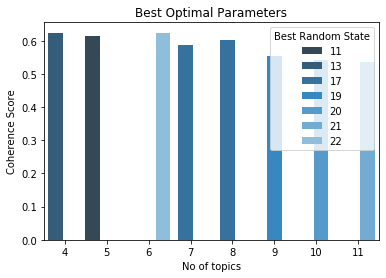

In [101]:
import seaborn as sns

fig, ax = plt.subplots()


maxrs = [13,11,22,17,17,19,20 ,21]
no_t = [4,5,6,7,8,9, 10,11]
coherence_lda = [0.6244539690410158,0.6141899090632023, 0.6227334951083877,0.5866453005182215 ,0.6018324260931335 ,0.553033747984315,0.5418981448796439, 0.5357900491135461]
best_df = pd.DataFrame({'No of topics': no_t, 'Best Random State': maxrs , 'Coherence Score': coherence_lda})
best_df.style.hide_index()
best_df
sns.barplot(ax = ax,x="No of topics", y="Coherence Score", hue="Best Random State", linewidth =7,data=best_df, saturation=1.0,  palette="Blues_d").set_title('Best Optimal Parameters')

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

plt.show()

In [39]:
# Let us re compute the model with random state :22 and no of topics: 6

In [40]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=6, 
                                       random_state=22,
                                       passes=10,
                                       per_word_topics=True)

In [41]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_reviews, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.807553747016452

Coherence Score:  0.6227334951083877


In [48]:
maxrs = 22
no_t = 6
result_df = pd.DataFrame({'No of topics': [no_t], 'Best Random State ': [maxrs] , ' Coherence Score': [coherence_lda]})
result_df.style.hide_index()

No of topics,Best Random State,Coherence Score
6,22,0.622733


In [49]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\Reena\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.201579 -0.034889       1        1  30.410755
0     -0.121047  0.157797       2        1  18.657087
2     -0.027753  0.101291       3        1  16.276865
3     -0.098714 -0.270726       4        1  13.229585
4      0.150458  0.173709       5        1  12.394881
5      0.298635 -0.127182       6        1   9.030821, topic_info=    Category         Freq     Term        Total  loglift  logprob
17   Default  6222.000000    phone  6222.000000  30.0000  30.0000
52   Default  1930.000000  product  1930.000000  29.0000  29.0000
60   Default  2809.000000   camera  2809.000000  28.0000  28.0000
12   Default  1338.000000   mobile  1338.000000  27.0000  27.0000
4    Default  2811.000000  battery  2811.000000  26.0000  26.0000
..       ...          ...      ...          ...      ...      ...
261   Topic6    36.092369   please   167.818207   0.8677  -5.3836
109   Topic6    37.062798   charge   275.157410   0.3998  -5.3570
17    Topic6    50.006256    phone  6222.340332  -2.4192  -5.0575
498   Topic6    29.718792  version    80.102188   1.4130  -5.5779
45    Topic6    31.305946       ..   227.066376   0.4231  -5.5258

[358 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
45        1  0.171756         ..
45        3  0.026424         ..
45        4  0.493248         ..
45        5  0.171756         ..
45        6  0.136524         ..
...     ...       ...        ...
493       2  0.994700      worth
34        5  0.975980      wrost
358       6  0.985627         ye
1300      3  0.968647  yesterday
2477      3  0.965474       zoom

[482 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4, 5, 6])


## Task 11: The business should  be able to interpret the topics.
    
   ### a. Name each of the identified topics.

   ### b. Create a table with the topic name and the top 10 terms in each to present to the  business
   

a. Name each of the identified topics.


In [50]:
topics = lda_model.show_topics(formatted=False)
topic_id = [t[0] for t in topics]
print (topic_id)
names = ['Mobile issues', 'Battery Performance', 'Features and Details' , 'Phone Performance', 'Amazon Services' , 'Value For Money']
named_df = pd.DataFrame({'Topic ID ' : [topic_id], 'Business Name': [names]})

[0, 1, 2, 3, 4, 5]


b. Create a table with the topic name and the top 10 terms in each to present to the  business


In [51]:
   
topics = lda_model.show_topics(formatted=False)
topic_id = [t[0] for t in topics]
print (topic_id)
top_terms = []
for topic in topics:
    top_terms.append([term[0] for term in topic[1]])
    
topic_df = pd.DataFrame({'Topic ID': topic_id, 'Top Terms':top_terms})
#topic_df.sort_values(by=[topic_df.columns[0]])
topic_df.style.hide_index()



[0, 1, 2, 3, 4, 5]


Topic ID,Top Terms
0,"['phone', 'problem', 'heating', 'issue', 'time', 'call', 'heat', 'network', 'month', 'screen']"
1,"['battery', 'phone', 'camera', 'price', 'backup', 'issue', 'day', 'performance', 'quality', 'hour']"
2,"['note', 'k8', 'phone', 'lenovo', 'service', 'screen', 'speaker', 'glass', 'system', 'music']"
3,"['camera', 'mobile', 'quality', 'charger', 'performance', 'feature', 'clarity', 'mode', '..', 'turbo']"
4,"['product', 'amazon', 'issue', 'delivery', 'network', 'handset', 'sim', 'return', 'service', 'lenovo']"
5,"['money', 'waste', 'value', 'hai', 'superb', 'h', 'ho', 'phone..', 'class', 'plz']"


Show topics shows the term and their probabilities for all 6 topics

In [57]:
topics = lda_model.show_topics(formatted=False)
topics[0]

(0,
 [('phone', 0.2178652),
  ('problem', 0.08074659),
  ('heating', 0.03088238),
  ('issue', 0.025353067),
  ('time', 0.021714354),
  ('call', 0.018495345),
  ('heat', 0.017952438),
  ('network', 0.017068915),
  ('month', 0.01258463),
  ('screen', 0.0121745095)])

# Conclusion: 

POS Tagging , topic modelling using LDA and topic interpretation has been successfully completed.\
LDA optimal model with 6 topics and their top 10 relevant terms have been extracted and visually plotted.\
Random state of 22 was used giving us a pretty high score of 62% as the coherence score

In [75]:
maxrs = [39,22]
no_t = [6,12]
coherence_lda = [0.622733, 0.565889]
result_df = pd.DataFrame({'No of topics': no_t, 'Best Random State': maxrs , 'Coherence Score': coherence_lda})
result_df.style.hide_index()
result_df

,No of topics,Best Random State,Coherence Score
0,6,39,0.622733
1,12,22,0.565889


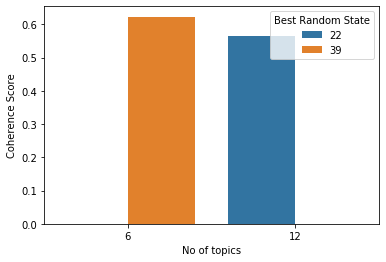

In [76]:
sns.barplot(x="No of topics", y="Coherence Score", hue="Best Random State", data=result_df)